<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/ML_Marco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
dataset = pd.read_excel('dataset_mar.xlsx')


In [3]:
dataset.head()

,DS_MARCA,NO_MODELO,NR_SERIE,NR_ANO,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,ERRO_MEDIO_1,DESVIO_CONC_I,ERRO_MEDIO_2,DESVIO_CONC_II,ERRO_MEDIO_2.1,DESVIO_CONC_III,DIF_ANTERIOR_1,DIF_ANTERIOR_2,DIF_ANTERIOR_3,CLASSE
0,ALCOLIZER,LE5,22000002,2019,43809,MRC Líquido,Subsequente,PE,Aprovado,-0.0016,0.002,-0.0052,0.001,-0.0076,0.836,-0.0060,-0.0050,-0.0128,0
1,ALCOLIZER,LE5,22000339,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0054,0.002,-0.0132,0.003,-0.0102,0.193,-0.0222,-0.0428,-0.0392,0
2,ALCOLIZER,LE5,22000372,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0074,0.001,-0.0162,0.001,-0.0168,0.257,0.1916,0.3028,0.4022,0
3,ALCOLIZER,LE5,22000575,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0062,0.002,-0.0154,0.001,-0.0124,0.352,0.1928,0.3036,0.4066,0
4,DRAGER,ALCOTEST 7410 PLUS,ARAA-0279,2016,42692,MRC Gasoso,Subsequente,RS,Aprovado,-0.0113,0.003,-0.0225,0.009,-0.0485,1.609,-0.0018,-0.0079,-0.0167,1


In [29]:
x = dataset.drop(columns=['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO', 'TP_ENSAIO', 'UF_ENSAIO', 'DS_RESULTADO', 'CLASSE']).values
y = dataset.iloc[:,-1].values

In [5]:
print(y)

[0 0 0 ... 1 1 1]


In [30]:
print(x)

[[-0.0016  0.002  -0.0052 ... -0.006  -0.005  -0.0128]
 [-0.0054  0.002  -0.0132 ... -0.0222 -0.0428 -0.0392]
 [-0.0074  0.001  -0.0162 ...  0.1916  0.3028  0.4022]
 ...
 [-0.0107  0.001  -0.0274 ... -0.0078 -0.0142  0.0099]
 [-0.004   0.001  -0.0052 ... -0.0049 -0.0056 -0.0273]
 [-0.0056  0.001   0.0038 ... -0.0047  0.0096  0.0053]]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [32]:
print(x_train)

[[-0.0257  0.     -0.0487 ... -0.0002 -0.001  -0.0026]
 [ 0.0035  0.001  -0.0013 ...  0.0296  0.0418  0.0682]
 [-0.025   0.001  -0.0465 ... -0.0044 -0.0059 -0.0197]
 ...
 [-0.0212  0.001  -0.0408 ...  0.0025  0.0047  0.0021]
 [-0.0234  0.001  -0.0506 ...  0.0009 -0.0023 -0.0022]
 [-0.0179  0.001  -0.0054 ... -0.0086  0.0041  0.0033]]


In [33]:
x_train.shape

(2844, 9)

In [34]:
y_test.shape

(712,)

1    3128
0     428
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


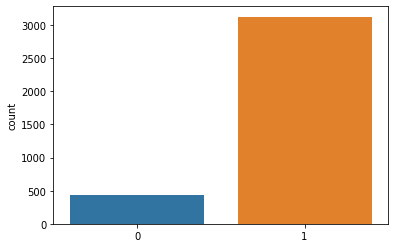

In [35]:
print(pd.Series(y).value_counts())
sns.countplot(y);

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
print(x_train)

[[-0.73659758 -1.19208146 -0.60343777 ... -0.17631716 -0.21395407
  -0.24308579]
 [ 2.05382823 -0.34977595  1.63052337 ...  1.13497491  0.63531217
   0.65934677]
 [-0.66970381 -0.34977595 -0.49975181 ... -0.36113014 -0.31118315
  -0.4610462 ]
 ...
 [-0.3065662  -0.34977595 -0.23111091 ... -0.05750882 -0.10085085
  -0.18317855]
 [-0.51680376 -0.34977595 -0.69298474 ... -0.12791376 -0.23974954
  -0.2379873 ]
 [ 0.00879014 -0.34977595  1.43729045 ... -0.54594312 -0.11275646
  -0.16788308]]


In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [39]:
y_res.shape

(688,)

1    344
0    344
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


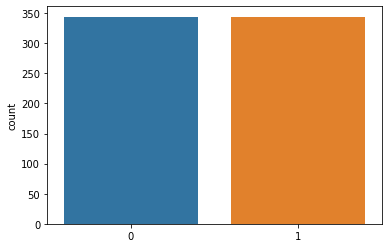

In [40]:
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_res = LogisticRegression()
model_res.fit(x_res, y_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)
 
 
# imprimir relatório de classificação
print("Relatório de Classificação LinearRegression:\n", classification_report(y_test, y_pred_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
print(accuracy_score(y_test, y_pred_res))


Relatório de Classificação LinearRegression:
               precision    recall  f1-score   support

           0     0.2073    0.6071    0.3091        84
           1     0.9292    0.6895    0.7916       628

    accuracy                         0.6798       712
   macro avg     0.5683    0.6483    0.5503       712
weighted avg     0.8440    0.6798    0.7347       712

Acurácia: 0.6798

0.6797752808988764


In [42]:
from sklearn.svm import SVC
model_svc = SVC(kernel = 'linear', random_state = 0)
model_svc.fit(x_res, y_res)
y_pred_svc = model_svc.predict(x_test)

# imprimir relatório de classificação
print("Relatório de Classificação SVC:\n", classification_report(y_test, y_pred_svc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_svc)))
 
print(accuracy_score(y_test, y_pred_svc))


Relatório de Classificação SVC:
               precision    recall  f1-score   support

           0     0.2121    0.5000    0.2979        84
           1     0.9183    0.7516    0.8266       628

    accuracy                         0.7219       712
   macro avg     0.5652    0.6258    0.5622       712
weighted avg     0.8350    0.7219    0.7642       712

Acurácia: 0.7219

0.7219101123595506


In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dtc.fit(x_res, y_res)
y_pred_dtc = model_dtc.predict(x_test)

# imprimir relatório de classificação
print("Relatório de Classificação DecisionTreeClassifier:\n", classification_report(y_test, y_pred_dtc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_dtc)))
 
print(accuracy_score(y_test, y_pred_dtc))


Relatório de Classificação DecisionTreeClassifier:
               precision    recall  f1-score   support

           0     0.1549    0.5238    0.2391        84
           1     0.9065    0.6178    0.7348       628

    accuracy                         0.6067       712
   macro avg     0.5307    0.5708    0.4870       712
weighted avg     0.8179    0.6067    0.6764       712

Acurácia: 0.6067

0.6067415730337079


In [44]:
cm_reg = confusion_matrix(y_test, y_pred_res)
print('Matriz de Confusão LinearRegression: \n {}'.format(cm_reg))
cm_svc = confusion_matrix(y_test, y_pred_svc)
print('Matriz de Confusão SVC: \n {}'.format(cm_svc))
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Matriz de Confusão DTC: \n {}'.format(cm_dtc))


Matriz de Confusão LinearRegression: 
 [[ 51  33]
 [195 433]]
Matriz de Confusão SVC: 
 [[ 42  42]
 [156 472]]
Matriz de Confusão DTC: 
 [[ 44  40]
 [240 388]]


# **Treinamento com modelo Alco-Sensor**


In [23]:
df_remove1 = dataset.loc[((dataset['DS_MARCA'] == 'ALCOLIZER'))]

In [24]:
df_remove2 = dataset.loc[((dataset['DS_MARCA'] == 'DRAGER'))]
df_remove3 = dataset.loc[((dataset['DS_MARCA'] == 'ELEC'))]

In [25]:
dataset_as = dataset.drop(df_remove1.index)
dataset_as = dataset.drop(df_remove2.index)
dataset_as = dataset.drop(df_remove3.index)

In [45]:
x_as = dataset_as.drop(columns=['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO', 'TP_ENSAIO', 'UF_ENSAIO', 'DS_RESULTADO', 'CLASSE']).values
y_as = dataset_as.iloc[:,-1].values

In [46]:
print(x_as)

[[-0.0016  0.002  -0.0052 ... -0.006  -0.005  -0.0128]
 [-0.0054  0.002  -0.0132 ... -0.0222 -0.0428 -0.0392]
 [-0.0074  0.001  -0.0162 ...  0.1916  0.3028  0.4022]
 ...
 [-0.0107  0.001  -0.0274 ... -0.0078 -0.0142  0.0099]
 [-0.004   0.001  -0.0052 ... -0.0049 -0.0056 -0.0273]
 [-0.0056  0.001   0.0038 ... -0.0047  0.0096  0.0053]]


In [47]:
from sklearn.model_selection import train_test_split
x_as_train, x_as_test, y_as_train, y_as_test = train_test_split(x_as, y_as, test_size = 0.2, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_as_train = sc.fit_transform(x_as_train)
x_as_test = sc.transform(x_as_test)

In [49]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_as_res, y_as_res = rus.fit_sample(x_as_train, y_as_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_as_res = LogisticRegression()
model_as_res.fit(x_as_res, y_as_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_as_res = model_as_res.predict(x_as_test)
y_proba_as_res = model_as_res.predict_proba(x_as_test)
 
 
# imprimir relatório de classificação
print("Relatório de Classificação LinearRegression:\n", classification_report(y_as_test, y_pred_as_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_as_test, y_pred_as_res)))
 
print(accuracy_score(y_as_test, y_pred_as_res))

Relatório de Classificação LinearRegression:
               precision    recall  f1-score   support

           0     0.2000    0.5200    0.2889        50
           1     0.9389    0.7801    0.8522       473

    accuracy                         0.7553       523
   macro avg     0.5695    0.6501    0.5705       523
weighted avg     0.8683    0.7553    0.7983       523

Acurácia: 0.7553

0.7552581261950286


In [51]:
from sklearn.svm import SVC
model_as_svc = SVC(kernel = 'linear', random_state = 0)
model_as_svc.fit(x_as_res, y_as_res)
y_pred_as_svc = model_as_svc.predict(x_as_test)

# imprimir relatório de classificação
print("Relatório de Classificação SVC:\n", classification_report(y_as_test, y_pred_as_svc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_as_test, y_pred_as_svc)))
 
print(accuracy_score(y_as_test, y_pred_as_svc))


Relatório de Classificação SVC:
               precision    recall  f1-score   support

           0     0.2212    0.4600    0.2987        50
           1     0.9356    0.8288    0.8789       473

    accuracy                         0.7935       523
   macro avg     0.5784    0.6444    0.5888       523
weighted avg     0.8673    0.7935    0.8235       523

Acurácia: 0.7935

0.7934990439770554


In [52]:
from sklearn.tree import DecisionTreeClassifier
model_as_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_as_dtc.fit(x_as_res, y_as_res)
y_pred_as_dtc = model_as_dtc.predict(x_as_test)

# imprimir relatório de classificação
print("Relatório de Classificação DecisionTreeClassifier:\n", classification_report(y_as_test, y_pred_as_dtc, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_as_test, y_pred_as_dtc)))
 
print(accuracy_score(y_as_test, y_pred_as_dtc))

Relatório de Classificação DecisionTreeClassifier:
               precision    recall  f1-score   support

           0     0.1475    0.6400    0.2397        50
           1     0.9412    0.6089    0.7394       473

    accuracy                         0.6119       523
   macro avg     0.5443    0.6244    0.4896       523
weighted avg     0.8653    0.6119    0.6916       523

Acurácia: 0.6119

0.6118546845124283


In [53]:
cm_as_reg = confusion_matrix(y_as_test, y_pred_as_res)
print('Matriz de Confusão LinearRegression: \n {}'.format(cm_as_reg))
cm_as_svc = confusion_matrix(y_as_test, y_pred_as_svc)
print('Matriz de Confusão SVC: \n {}'.format(cm_as_svc))
cm_as_dtc = confusion_matrix(y_as_test, y_pred_as_dtc)
print('Matriz de Confusão DTC: \n {}'.format(cm_as_dtc))


Matriz de Confusão LinearRegression: 
 [[ 26  24]
 [104 369]]
Matriz de Confusão SVC: 
 [[ 23  27]
 [ 81 392]]
Matriz de Confusão DTC: 
 [[ 32  18]
 [185 288]]
